In [3]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
#Reading the data file
df = pd.read_csv("Data/anime.csv")
# Showing data contents (rows)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
# finding no. of rows and columns
print('Anime dataframe dimensions: ', df.shape)

Anime dataframe dimensions:  (12294, 7)


In [6]:
#Counting column 
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [7]:
# Unknown/missing data handelling (rating)
df.loc[df['rating'].isnull(), 'rating'] = 0.0
df['rating'].isnull().any()

False

<AxesSubplot:>

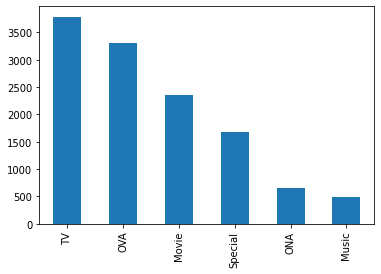

In [8]:
# Checking type in data and plotting in chart
df['type'].value_counts().plot.bar()

In [9]:
# Unknown/missing data handelling (episodes)
df.loc[(df['episodes']=="Unknown") & (df['type'].isnull())].head()

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,0.0,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,Unknown,0.0,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,Unknown,0.0,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,Unknown,0.0,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,Unknown,0.0,8666


In [10]:
# Unknown/missing data finding (genre)
df.isnull().sum()

anime_id     0
name         0
genre       62
type        25
episodes     0
rating       0
members      0
dtype: int64

In [11]:
# Unknown/missing data handelling (genre)
df[df['genre'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607
...,...,...,...,...,...,...,...
11070,32032,Seikaisuru Kado,NaN,NaN,Unknown,0.00,1797
11086,34310,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...,NaN,Movie,1,0.00,51
11097,34474,Tsukipro The Animation,NaN,TV,Unknown,0.00,843
11112,33035,Yuyushiki Special,NaN,Special,1,0.00,2294


In [12]:
# replacing missing genre data with 'Unknown'
df['genre'].fillna('Unknown', inplace=True)
df.isnull().any()

anime_id    False
name        False
genre       False
type         True
episodes    False
rating      False
members     False
dtype: bool

In [13]:
# Showing data contents (rows)
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [14]:
# Finding members in dataframe having quantile over requested axis(0.75) and mean of rating
m = df.members.quantile(0.75)
C = df.rating.mean()
print(m, C)

9437.0 6.35278591182692


In [15]:
# function for calcuating weighted rating
def weighted_rating(df, m, C):
    term = df['members'] / (m + df['members'])
    return df['rating'] * term + (1-term) * C

In [16]:
df['user_rating'] = df.apply(weighted_rating, axis=1, args=(m,C))
df.head()

,anime_id,name,genre,type,episodes,rating,members,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,9.234455
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9.225838
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,9.028971
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,9.131075
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,8.995151


In [17]:
df.drop(['rating', 'members'], axis=1, inplace=True)
df.head()

,anime_id,name,genre,type,episodes,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.234455
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.225838
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.028971
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.131075
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,8.995151


In [18]:
# Breaking down gemre and type for the algorithm to treat them as equal
df = pd.concat([df, df['type'].str.get_dummies(), df['genre'].str.get_dummies(sep=',')], axis=1)
df.head()

,anime_id,name,genre,type,episodes,user_rating,Movie,Music,ONA,OVA,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.234455,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.225838,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.028971,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.131075,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,8.995151,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
anime_features = df.loc[:, "Movie":].copy()
anime_features.head()

,Movie,Music,ONA,OVA,Special,TV,Adventure,Cars,Comedy,Dementia,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
# Calcuating the similarity matrix and displaying it in the array
cosine_sim = cosine_similarity(anime_features.values, anime_features.values)
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.31622777],
       [0.        , 1.        , 0.375     , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.375     , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.31622777, 0.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ]])

In [21]:
# finding no. of rows and columns of similarity
cosine_sim.shape

(12294, 12294)

In [22]:
#creating an index for each anime name.
anime_index = pd.Series(df.index, index=df.name).drop_duplicates()

In [23]:
# function for showing anime recommendation
def get_recommendation(anime_name, similarity=cosine_sim):
    idx = anime_index[anime_name]
    
    # Get the pairwsie similarity scores of all anime with user input anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sorting the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Getting the scores of the 10 most similar anime
    sim_scores = sim_scores[0:11]

    # Getting the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Returning the top 10 most similar anime
    result = df[['anime_id','name', 'genre','episodes', 'user_rating']].iloc[anime_indices].drop(idx)
    return result

In [24]:
print(" Top 10 Anime Recommendation: ")
get_recommendation("Kimi no Na wa.")

 Top 10 Anime Recommendation: 


,anime_id,name,genre,episodes,user_rating
208,28725,Kokoro ga Sakebitagatterunda.,"Drama, Romance, School",1,8.051294
1494,20903,Harmonie,"Drama, School, Supernatural",1,7.233643
1959,713,Air Movie,"Drama, Romance, Supernatural",1,7.207439
60,10408,Hotarubi no Mori e,"Drama, Romance, Shoujo, Supernatural",1,8.507033
1199,6408,&quot;Bungaku Shoujo&quot; Movie,"Drama, Mystery, Romance, School",1,7.390951
2103,1723,Clannad Movie,"Drama, Fantasy, Romance, School",1,7.263618
5796,30585,Taifuu no Noruda,"Drama, School, Sci-Fi, Supernatural",1,6.351108
5805,547,Wind: A Breath of Heart OVA,"Drama, Romance, School, Supernatural",3,6.352290
6394,546,Wind: A Breath of Heart (TV),"Drama, Romance, School, Supernatural",13,6.256646
894,10389,Momo e no Tegami,"Drama, Supernatural",1,7.442914


In [25]:
print(" Top 10 Anime Recommendation: ")
get_recommendation("Shingeki no Kyojin")

 Top 10 Anime Recommendation: 


,anime_id,name,genre,episodes,user_rating
10899,25777,Shingeki no Kyojin Season 2,"Action, Drama, Fantasy, Shounen, Super Power",Unknown,0.334007
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",Unknown,8.539132
717,18397,Shingeki no Kyojin OVA,"Action, Drama, Fantasy, Shounen, Super Power",3,7.769561
961,23777,Shingeki no Kyojin Movie 2: Jiyuu no Tsubasa,"Action, Drama, Fantasy, Shounen, Super Power",1,7.387711
1069,23775,Shingeki no Kyojin Movie 1: Guren no Yumiya,"Action, Drama, Fantasy, Shounen, Super Power",1,7.393107
3533,19285,Shingeki no Kyojin: Ano Hi Kara,"Action, Drama, Fantasy, Shounen, Super Power",1,6.862926
2135,30901,Utawarerumono: Itsuwari no Kamen,"Action, Drama, Fantasy",25,7.205859
3437,2772,Juushin Enbu: Hero Tales,"Action, Fantasy, Shounen",26,6.758172
3961,447,Weiß Kreuz,"Action, Drama, Shounen",25,6.635433
4478,446,Weiß Kreuz Glühen,"Action, Drama, Shounen",13,6.509721


In [26]:
print(" Top 10 Anime Recommendation: ")
get_recommendation("Black Clover")

 Top 10 Anime Recommendation: 


,anime_id,name,genre,episodes,user_rating
2761,17391,Senyuu. Specials,"Action, Comedy, Fantasy, Shounen",4,6.777149
3144,31138,Overlord: Ple Ple Pleiades,"Action, Comedy, Fantasy, Magic",8,6.876961
10508,24619,Tenkuu Senki Shurato Recaps,"Action, Fantasy, Magic, Shounen",2,6.355831
9421,30873,Madou King Granzort: Nonstop Rabi,"Action, Comedy, Fantasy, Magic, Mecha, Sci-Fi,...",1,6.355379
207,27821,Fate/stay night: Unlimited Blade Works - Prologue,"Action, Fantasy, Magic, Shounen, Supernatural",1,8.159710
1785,31389,Fate/stay night: Unlimited Blade Works 2nd Sea...,"Action, Fantasy, Magic, Shounen, Supernatural",1,7.153559
3698,6741,Makai Senki Disgaea: Welcome to Netherworld,"Action, Comedy, Demons, Fantasy, Magic",1,6.500847
3833,21235,Log Horizon Recap,"Action, Adventure, Fantasy, Magic, Shounen",1,6.622009
4978,9690,Densetsu no Yuusha no Densetsu: Iris Report,"Action, Adventure, Fantasy, Magic, Shounen",1,6.478867
5955,4566,Prism Ark Specials,"Action, Comedy, Drama, Fantasy, Magic",6,6.344987


In [27]:
print(" Top 10 Anime Recommendation: ")
get_recommendation("One Piece")

 Top 10 Anime Recommendation: 


,anime_id,name,genre,episodes,user_rating
2472,1132,Digimon Frontier,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",50,7.149640
206,813,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy, Martial Ar...",291,8.271793
231,19123,One Piece: Episode of Merry - Mou Hitori no Na...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",1,7.604889
241,15323,One Piece: Episode of Nami - Koukaishi no Nami...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",1,7.740105
515,22777,Dragon Ball Kai (2014),"Action, Adventure, Comedy, Fantasy, Martial Ar...",61,7.709842
588,6033,Dragon Ball Kai,"Action, Adventure, Comedy, Fantasy, Martial Ar...",97,7.830629
896,31289,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",1,7.149417
1930,30694,Dragon Ball Super,"Action, Adventure, Comedy, Fantasy, Martial Ar...",Unknown,7.318245
86,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",25,8.517209
989,10033,Toriko,"Action, Adventure, Comedy, Fantasy, Shounen",147,7.536174


In [28]:
def get_rating(anime_name, similarity=cosine_sim):
    idx = anime_index[anime_name]
    
    # Get the pairwsie similarity scores of all anime with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar anime
    sim_scores = sim_scores[0:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar anime
    result2 = df[['name','user_rating']].iloc[anime_indices].drop(idx)
    return result2

In [29]:
get_rating("One Piece")

,name,user_rating
2472,Digimon Frontier,7.149640
206,Dragon Ball Z,8.271793
231,One Piece: Episode of Merry - Mou Hitori no Na...,7.604889
241,One Piece: Episode of Nami - Koukaishi no Nami...,7.740105
515,Dragon Ball Kai (2014),7.709842
588,Dragon Ball Kai,7.830629
896,One Piece: Episode of Sabo - 3 Kyoudai no Kizu...,7.149417
1930,Dragon Ball Super,7.318245
86,Shingeki no Kyojin,8.517209
989,Toriko,7.536174


<AxesSubplot:>

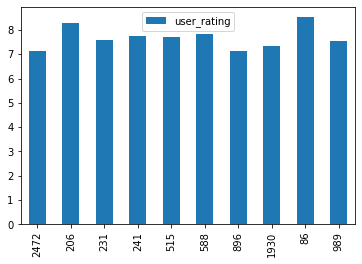

In [30]:
get_rating("One Piece").plot.bar()

In [31]:
print(" Top 10 Anime Recommendation: ")
get_recommendation("Sword Art Online")

 Top 10 Anime Recommendation: 


,anime_id,name,genre,episodes,user_rating
2132,21881,Sword Art Online II,"Action, Adventure, Fantasy, Game, Romance",24,7.332806
708,28121,Dungeon ni Deai wo Motomeru no wa Machigatteir...,"Action, Adventure, Comedy, Fantasy, Romance",13,7.838320
3392,20021,Sword Art Online: Extra Edition,"Action, Adventure, Fantasy, Game, Romance",1,6.953432
4716,1189,Eden&#039;s Bowy,"Action, Adventure, Fantasy, Romance, Sci-Fi",26,6.442896
5885,7334,Bakugan Battle Brawlers: Gundalian Invaders,"Action, Adventure, Fantasy, Game, Shounen",39,6.335058
5970,10330,Bakugan Battle Brawlers: Mechtanium Surge,"Action, Adventure, Fantasy, Game, Shounen",46,6.322737
10908,31765,Sword Art Online Movie: Ordinal Scale,"Action, Adventure, Fantasy, Game, Romance",1,0.992883
775,22199,Akame ga Kill!,"Action, Adventure, Fantasy",24,7.812018
1301,30911,Tales of Zestiria the X,"Action, Adventure, Fantasy",12,7.499197
3564,5940,Seiken no Blacksmith,"Action, Adventure, Fantasy",12,6.888186


In [32]:
get_rating("Sword Art Online")

,name,user_rating
2132,Sword Art Online II,7.332806
708,Dungeon ni Deai wo Motomeru no wa Machigatteir...,7.838320
3392,Sword Art Online: Extra Edition,6.953432
4716,Eden&#039;s Bowy,6.442896
5885,Bakugan Battle Brawlers: Gundalian Invaders,6.335058
5970,Bakugan Battle Brawlers: Mechtanium Surge,6.322737
10908,Sword Art Online Movie: Ordinal Scale,0.992883
775,Akame ga Kill!,7.812018
1301,Tales of Zestiria the X,7.499197
3564,Seiken no Blacksmith,6.888186


<AxesSubplot:>

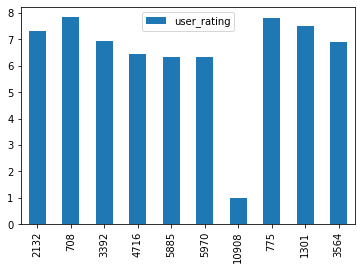

In [37]:
get_rating("Sword Art Online").plot.bar()

In [33]:
print(" Top 10 Anime Recommendation: ")
get_recommendation("Tokyo Ghoul")

 Top 10 Anime Recommendation: 


,anime_id,name,genre,episodes,user_rating
1518,27899,Tokyo Ghoul √A,"Action, Drama, Horror, Mystery, Psychological,...",12,7.493635
760,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",13,7.827677
388,33253,Ajin 2nd Season,"Action, Horror, Mystery, Seinen, Supernatural",13,7.845790
882,31580,Ajin,"Action, Horror, Mystery, Seinen, Supernatural",13,7.700963
67,22535,Kiseijuu: Sei no Kakuritsu,"Action, Drama, Horror, Psychological, Sci-Fi, ...",24,8.541453
1268,31297,Tokyo Ghoul: &quot;Pinto&quot;,"Action, Drama, Horror, Mystery, Psychological,...",1,7.417862
2332,395,Gantz 2nd Stage,"Action, Drama, Horror, Psychological, Sci-Fi, ...",13,7.198515
2391,369,Boogiepop wa Warawanai: Boogiepop Phantom,"Dementia, Drama, Horror, Mystery, Psychologica...",12,7.117387
2399,384,Gantz,"Action, Drama, Horror, Psychological, Sci-Fi, ...",13,7.220474
2540,1246,Yuugo: Koushounin,"Action, Drama, Military, Mystery, Psychologica...",13,6.701393


In [35]:
get_rating("Tokyo Ghoul")

,name,user_rating
1518,Tokyo Ghoul √A,7.493635
760,Elfen Lied,7.827677
388,Ajin 2nd Season,7.845790
882,Ajin,7.700963
67,Kiseijuu: Sei no Kakuritsu,8.541453
1268,Tokyo Ghoul: &quot;Pinto&quot;,7.417862
2332,Gantz 2nd Stage,7.198515
2391,Boogiepop wa Warawanai: Boogiepop Phantom,7.117387
2399,Gantz,7.220474
2540,Yuugo: Koushounin,6.701393


<AxesSubplot:>

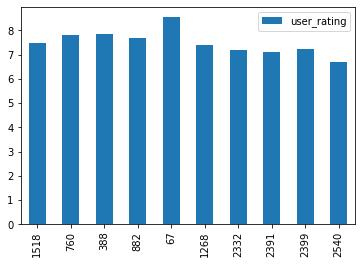

In [38]:
get_rating("Tokyo Ghoul").plot.bar()